In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import networkx as nx

In [4]:
from tensorflow import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from IPython.display import Image
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

import os



## Dataset


In [5]:
#Training set
df = pd.read_csv("readyDatset.csv")
print(' data: ',df.shape)

 data:  (23233, 6)


In [8]:
df.head(-20)

,insiderthreat,vector,date,user,source,action
0,1,0,1280707200,4,128,750
1,1,0,1280707200,4,128,763
2,1,0,1280707200,4,128,766
3,1,0,1280707200,4,128,673
4,1,0,1280793600,4,128,767
...,...,...,...,...,...,...
23208,0,0,1262872980,734,455,180
23209,0,0,1262872980,122,866,595
23210,0,0,1262872980,15,332,505
23211,0,0,1262872980,894,347,279


In [9]:
print("Target for training set:")
print(df['insiderthreat'].value_counts())

Target for training set:
1    14232
0     9001
Name: insiderthreat, dtype: int64


<AxesSubplot:>

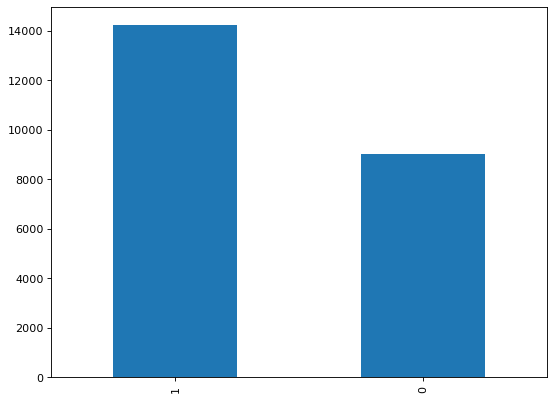

In [10]:
figure(figsize=(8, 6), dpi=80)

df['insiderthreat'].value_counts().plot(kind='bar')


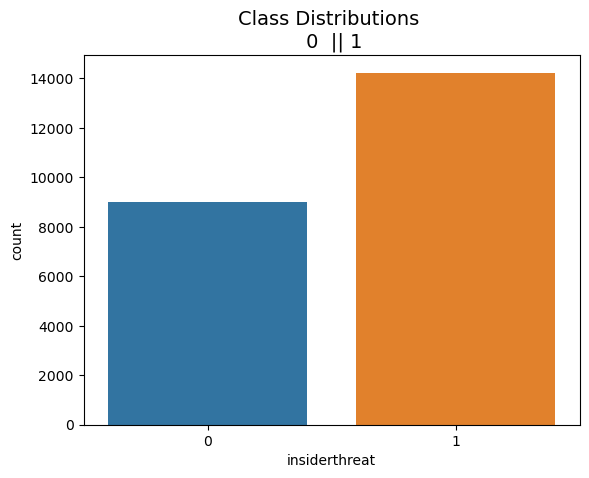

In [11]:
sns.countplot(x="insiderthreat", data=df)
plt.title('Class Distributions \n 0  || 1', fontsize=14)
plt.show()

<AxesSubplot:>

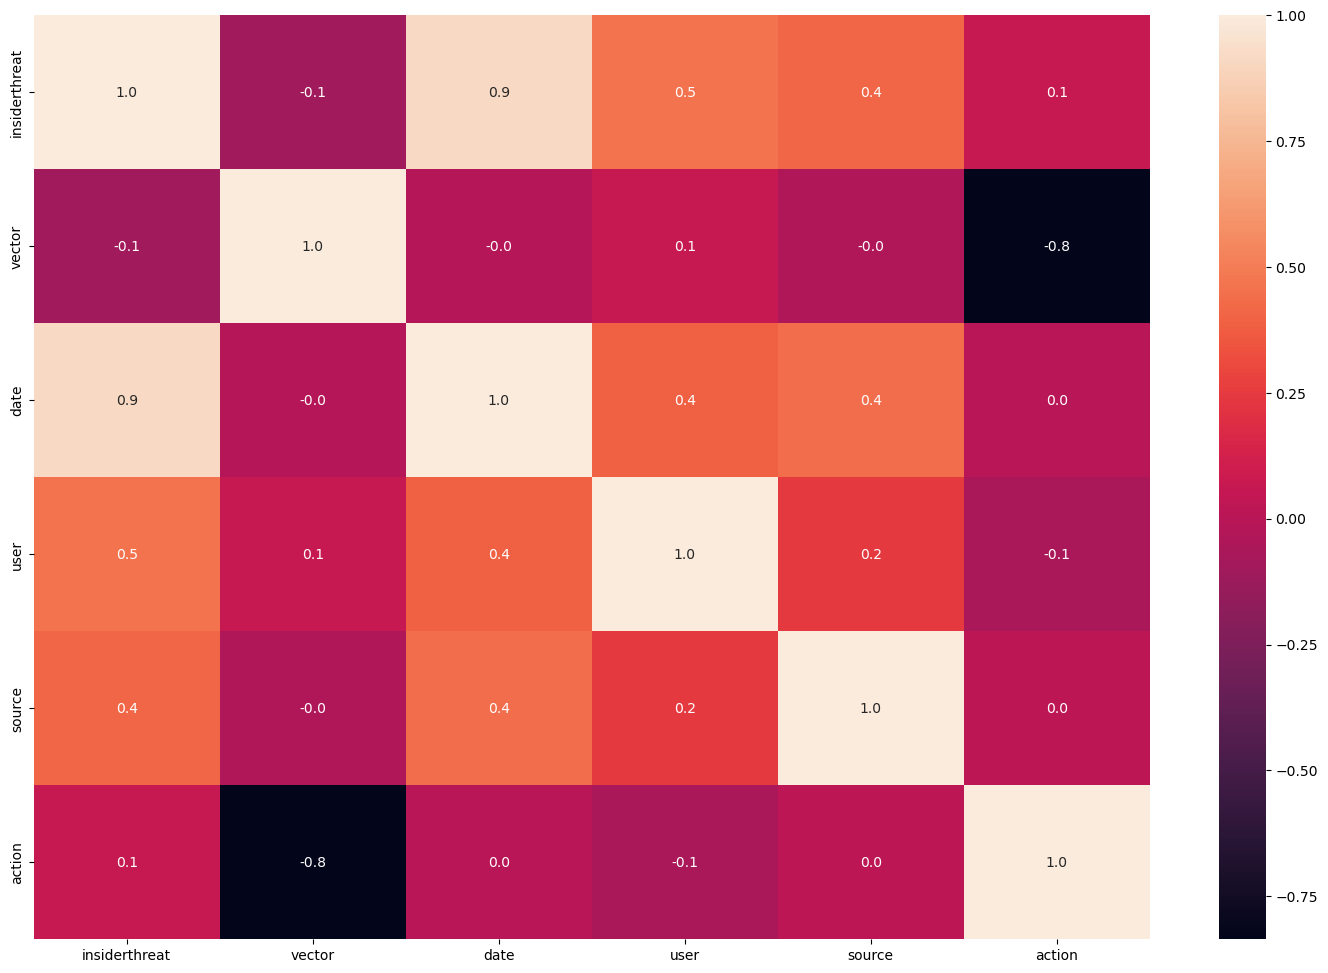

In [12]:
#correlation heatmap
plt.figure(figsize=(18,12));
sns.heatmap(df.corr(), annot=True, fmt='1.1f')

Splitting data to Train & Test

In [13]:
X = df.drop('insiderthreat', axis = 1)
y = df['insiderthreat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

# CNN Model

In [23]:
import keras
import keras.utils
from keras import utils as np_utils

In [25]:
#create new model 
CNN_model = Sequential()
CNN_model.add(Conv1D(128,2,  activation='relu',input_shape=(X_train.shape[1],1)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPool1D(2))
CNN_model.add(Dropout(0.2))


CNN_model.add(Conv1D(256,2,  activation='relu'))
CNN_model.add(BatchNormalization())
CNN_model.add(Dropout(0.4))

CNN_model.add(Flatten())
CNN_model.add(Dense(128,  activation='relu'))
CNN_model.add(Dropout(0.4))

CNN_model.add(Dense(1,  activation='sigmoid'))

opt= Adam(learning_rate=0.1)
CNN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

CNN_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 4, 128)            384       
                                                                 
 batch_normalization_7 (Batc  (None, 4, 128)           512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 2, 128)           0         
 1D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 2, 128)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 1, 256)            65792     
                                                                 
 batch_normalization_8 (Batc  (None, 1, 256)          

In [33]:
#early_stop= EarlyStopping(patience=5,verbose=1)
history = CNN_model.fit(X_train, y_train , epochs=10, validation_split=0.1, batch_size=16)

Epoch 1/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0061 - accuracy: 0.9920 - val_loss: 1.4124e-10 - val_accuracy: 1.0000
Epoch 2/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0065 - accuracy: 0.9917 - val_loss: 1.1622e-04 - val_accuracy: 1.0000
Epoch 3/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0084 - accuracy: 0.9898 - val_loss: 2.6533e-07 - val_accuracy: 1.0000
Epoch 4/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0077 - accuracy: 0.9902 - val_loss: 0.0991 - val_accuracy: 0.8962
Epoch 5/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0078 - accuracy: 0.9902 - val_loss: 2.8743e-04 - val_accuracy: 1.0000
Epoch 6/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.9891 - val_loss: 4.3781e-09 - val_accuracy: 1.0000
Epoch 7/10
1046/1046 [==============================] - 3s 3ms/step - loss: 0.0060 - accuracy: 0.9928 - val_loss: 1.

In [34]:
# Test the CNN model
pred2 = CNN_model.predict(X_test)
pred_d = []
for prediction in pred2:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred2 = np.array(pred_d)


print('accuracy:', accuracy_score(y_test, pred2))
print('f1-score:', f1_score(y_test, pred2, average='macro'))
print('Precision:', precision_score(y_test, pred2, average='macro'))
print('Recakk:', recall_score(y_test, pred2, average='macro'))

146/146 [==============================] - 0s 2ms/step
accuracy: 1.0
f1-score: 1.0
Precision: 1.0
Recakk: 1.0


## Learning Curve

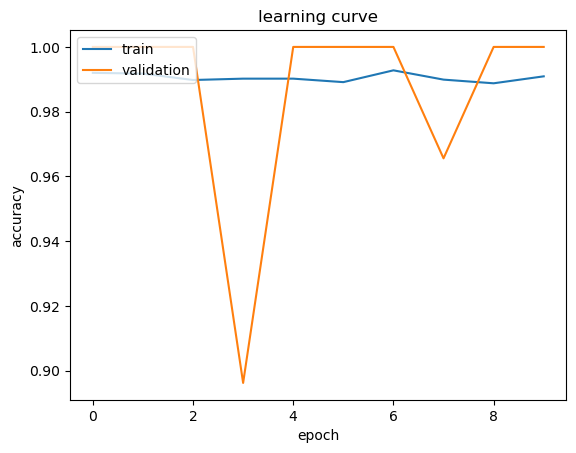

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('learning curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Generalization Curve

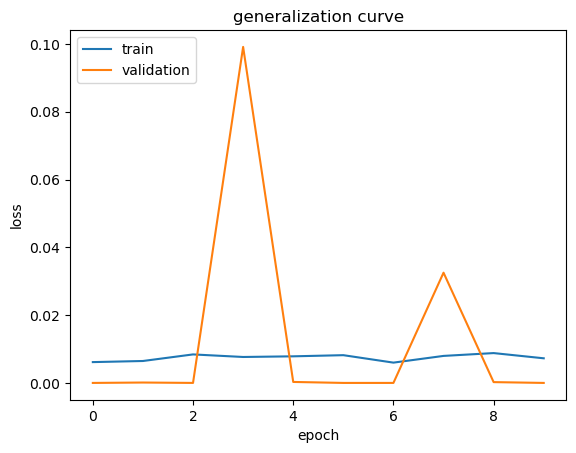

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('generalization curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# RNN Model

In [37]:
X_train = X_train.to_numpy()
sample = X_train.shape[0]
features = X_train.shape[1]

X_train = np.reshape(X_train,(sample,features,1)) #shape  = (125973, 18, 1)

In [38]:
# from keras.layers import SimpleRNN

from keras.layers import Embedding, SimpleRNN

RNN_model = Sequential()
RNN_model.add(SimpleRNN(64, input_shape=(X_train.shape[1],1), activation='tanh'))
RNN_model.add(Dense(1, activation='sigmoid'))
RNN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
RNN_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = RNN_model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=16,
                    validation_split=0.2)

Epoch 1/10
930/930 [==============================] - 8s 7ms/step - loss: 0.2030 - accuracy: 0.6925 - val_loss: 0.1930 - val_accuracy: 0.7171
Epoch 2/10
930/930 [==============================] - 7s 7ms/step - loss: 0.1893 - accuracy: 0.7174 - val_loss: 0.1832 - val_accuracy: 0.7214
Epoch 3/10
930/930 [==============================] - 6s 7ms/step - loss: 0.1832 - accuracy: 0.7226 - val_loss: 0.1704 - val_accuracy: 0.7590
Epoch 4/10
930/930 [==============================] - 7s 7ms/step - loss: 0.1654 - accuracy: 0.7587 - val_loss: 0.1586 - val_accuracy: 0.7673
Epoch 5/10
930/930 [==============================] - 6s 7ms/step - loss: 0.1489 - accuracy: 0.7822 - val_loss: 0.1423 - val_accuracy: 0.7873
Epoch 6/10
930/930 [==============================] - 6s 7ms/step - loss: 0.1371 - accuracy: 0.7890 - val_loss: 0.1088 - val_accuracy: 0.7967
Epoch 7/10
930/930 [==============================] - 5s 6ms/step - loss: 0.1194 - accuracy: 0.8280 - val_loss: 0.1843 - val_accuracy: 0.6721
Epoch 

In [40]:
# Test the RNN model
pred2 = RNN_model.predict(X_test)
pred_d = []
for prediction in pred2:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred2 = np.array(pred_d)


print('accuracy:', accuracy_score(y_test, pred2))
print('f1-score:', f1_score(y_test, pred2, average='macro'))
print('Precision:', precision_score(y_test, pred2, average='macro'))
print('Recakk:', recall_score(y_test, pred2, average='macro'))

146/146 [==============================] - 1s 2ms/step
accuracy: 0.8048203141811922
f1-score: 0.7854589529676914
Precision: 0.805611597543104
Recakk: 0.7765566092963353


## Learning Curve

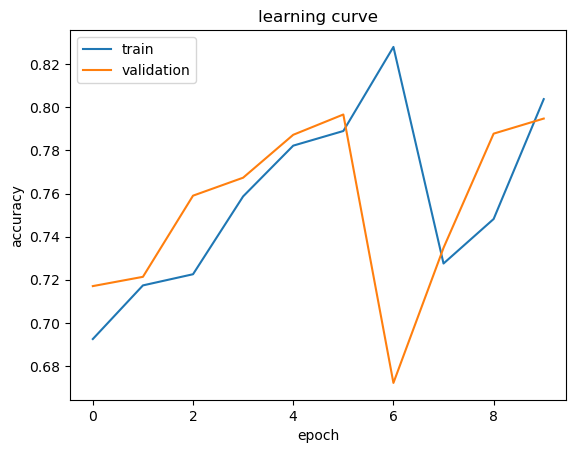

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('learning curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Generalization Curve

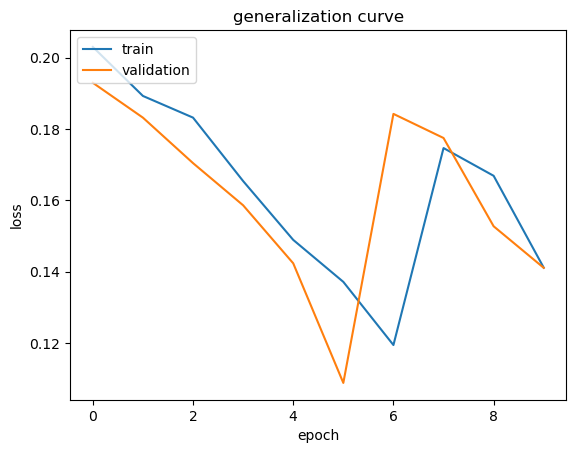

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('generalization curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# LSTM

In [43]:
from keras.layers import LSTM
from keras.layers import SimpleRNN


LSTM_model = keras.Sequential([

        keras.layers.LSTM(80,input_shape=(features,X_train.shape[2]),activation='tanh',recurrent_activation='sigmoid'),
        keras.layers.Dense(1,activation="tanh")
    ])

LSTM_model.compile(optimizer='adam',loss='mse', metrics=['accuracy'])

LSTM_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 80)                26240     
                                                                 
 dense_9 (Dense)             (None, 1)                 81        
                                                                 
Total params: 26,321
Trainable params: 26,321
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = LSTM_model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
117/117 [==============================] - 3s 9ms/step - loss: 0.2302 - accuracy: 0.6660 - val_loss: 0.1887 - val_accuracy: 0.7125
Epoch 2/10
117/117 [==============================] - 1s 6ms/step - loss: 0.1714 - accuracy: 0.7237 - val_loss: 0.1413 - val_accuracy: 0.8257
Epoch 3/10
117/117 [==============================] - 1s 6ms/step - loss: 0.1112 - accuracy: 0.8944 - val_loss: 0.1191 - val_accuracy: 0.8725
Epoch 4/10
117/117 [==============================] - 1s 5ms/step - loss: 0.0776 - accuracy: 0.9248 - val_loss: 0.0747 - val_accuracy: 0.9190
Epoch 5/10
117/117 [==============================] - 1s 5ms/step - loss: 0.0566 - accuracy: 0.9411 - val_loss: 0.0588 - val_accuracy: 0.9193
Epoch 6/10
117/117 [==============================] - 1s 5ms/step - loss: 0.0433 - accuracy: 0.9588 - val_loss: 0.0462 - val_accuracy: 0.9535
Epoch 7/10
117/117 [==============================] - 1s 5ms/step - loss: 0.0347 - accuracy: 0.9700 - val_loss: 0.0590 - val_accuracy: 0.9147
Epoch 

In [45]:
# Test the LSTM model
pred2 = LSTM_model.predict(X_test)
pred_d = []
for prediction in pred2:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred2 = np.array(pred_d)


print('accuracy:', accuracy_score(y_test, pred2))
print('f1-score:', f1_score(y_test, pred2, average='macro'))
print('Precision:', precision_score(y_test, pred2, average='macro'))
print('Recakk:', recall_score(y_test, pred2, average='macro'))

146/146 [==============================] - 1s 1ms/step
accuracy: 0.9780503550677857
f1-score: 0.9768479931351965
Precision: 0.9774475869208504
Recakk: 0.9762636108184053


## Learning Curve

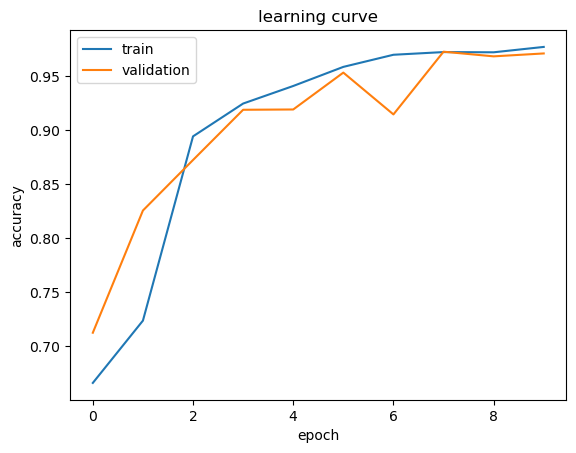

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('learning curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Generalization Curve

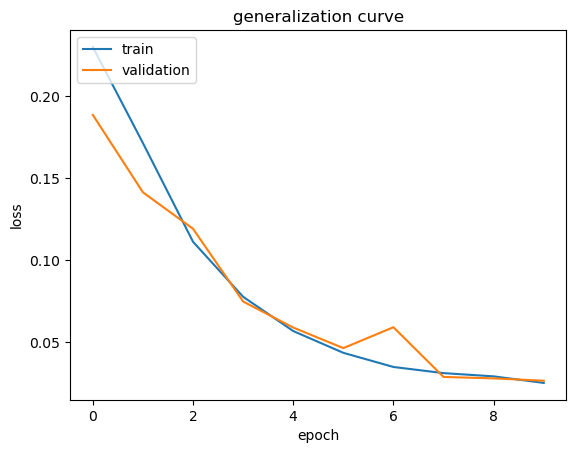

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('generalization curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------
# GCN

In [48]:

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# GCN model with 2 layers 
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, int(data.num_classes))

    def forward(self):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

data =  data.to(device)

model = Net().to(device)

ModuleNotFoundError: No module named 'torch'

In [ ]:
torch.manual_seed(42)

optimizer_name = "Adam"
lr = 1e-1
optimizer = getattr(torch.optim, optimizer_name)(model.parameters(), lr=lr)
epochs = 200

def train():
  model.train()
  optimizer.zero_grad()
  F.nll_loss(model()[data.train_mask], data.y[data.train_mask]).backward()
  optimizer.step()

@torch.no_grad()
def test():
  model.eval()
  logits = model()
  mask1 = data['train_mask']
  pred1 = logits[mask1].max(1)[1]
  acc1 = pred1.eq(data.y[mask1]).sum().item() / mask1.sum().item()
  mask = data['test_mask']
  pred = logits[mask].max(1)[1]
  acc = pred.eq(data.y[mask]).sum().item() / mask.sum().item()
  return acc1,acc

for epoch in range(1, epochs):
  train()

train_acc,test_acc = test()

print('#' * 70)
print('Train Accuracy: %s' %train_acc )
print('Test Accuracy: %s' % test_acc)
print('#' * 70)

## Learning Curve

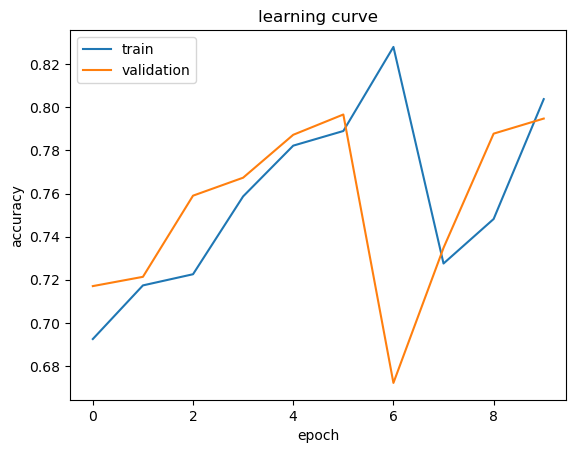

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('learning curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Generalization Curve

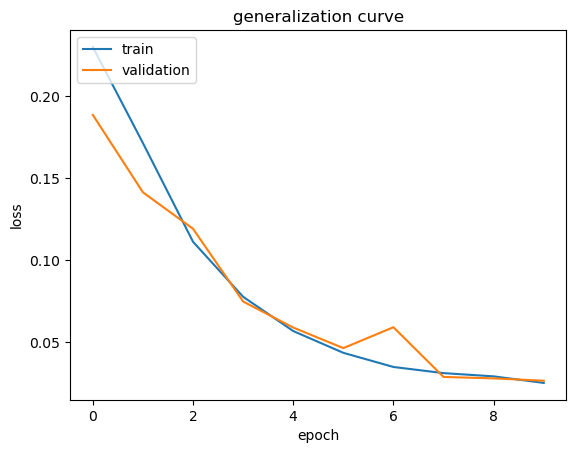

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('generalization curve')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()